# Predict Home Price

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import random

%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
data_describe =[]

for i in df.columns: 
    data_describe.append([ #add i, type data, how many NaN, percentage , how many unique, unique value 
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique() 
    ])

In [6]:
pd.DataFrame(data=data_describe, columns=['Data','Data Types','Null','Null Percentage','Unique','Unique Sample'])

,Data,Data Types,Null,Null Percentage,Unique,Unique Sample
0,id,int64,0,0.0,21436,"[7129300520, 6414100192, 5631500400, 248720087..."
1,date,object,0,0.0,372,"[20141013T000000, 20141209T000000, 20150225T00..."
2,price,float64,0,0.0,4028,"[221900.0, 538000.0, 180000.0, 604000.0, 51000..."
3,bedrooms,int64,0,0.0,13,"[3, 2, 4, 5, 1, 6, 7, 0, 8, 9, 11, 10, 33]"
4,bathrooms,float64,0,0.0,30,"[1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.7..."
5,sqft_living,int64,0,0.0,1038,"[1180, 2570, 770, 1960, 1680, 5420, 1715, 1060..."
6,sqft_lot,int64,0,0.0,9782,"[5650, 7242, 10000, 5000, 8080, 101930, 6819, ..."
7,floors,float64,0,0.0,6,"[1.0, 2.0, 1.5, 3.0, 2.5, 3.5]"
8,waterfront,int64,0,0.0,2,"[0, 1]"
9,view,int64,0,0.0,5,"[0, 3, 4, 2, 1]"


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Exploratory Analysis and Visualization

In [8]:
df.sort_values(by='price',ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387


In [9]:
top_harga = df.sort_values(by='price',ascending=False) 
print(top_harga['price'].head(10))
print(top_harga['yr_built'].head(10))

#dari sini bisa dilihat bahwa harga rumah, semakin lama rumah dibangun, harga relatif lebih mahal. (tapi blm tentu selalu lebih mahal)

7252    7700000.0
3914    7062500.0
9254    6885000.0
4411    5570000.0
1448    5350000.0
1315    5300000.0
1164    5110800.0
8092    4668000.0
2626    4500000.0
8638    4489000.0
Name: price, dtype: float64
7252    1910
3914    1940
9254    2001
4411    2001
1448    2009
1315    1991
1164    1999
8092    1983
2626    2004
8638    2001
Name: yr_built, dtype: int64


In [10]:
top_harga.head(10).index


Int64Index([7252, 3914, 9254, 4411, 1448, 1315, 1164, 8092, 2626, 8638], dtype='int64')

Text(0, 0.5, 'Harga (dalam jutaan)')

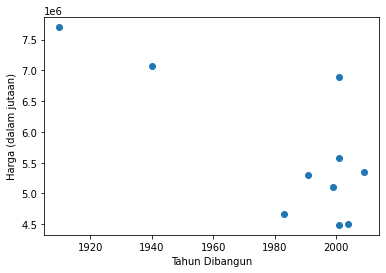

In [11]:
plt.scatter(x=top_harga['yr_built'].head(10),y=top_harga['price'].head(10))
plt.xlabel('Tahun Dibangun')
plt.ylabel('Harga (dalam jutaan)')

In [12]:
df['bedrooms'].value_counts() #mencari kira2 paling banyak berapa kamar tidur di dalam suatu rumah

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [13]:
df['bedrooms'].value_counts().index

Int64Index([3, 4, 2, 5, 6, 1, 7, 8, 0, 9, 10, 11, 33], dtype='int64')

In [14]:
df['bedrooms'].sort_values(ascending=False)

15870    33
8757     11
19254    10
13314    10
15161    10
         ..
14423     0
19452     0
9854      0
6994      0
9773      0
Name: bedrooms, Length: 21613, dtype: int64

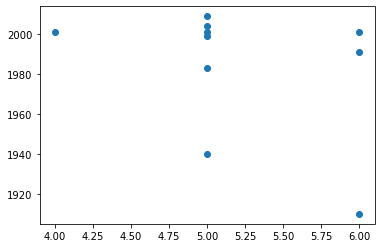

In [15]:
plt.scatter(top_harga['bedrooms'].head(10),top_harga['yr_built'].head(10))

Dari grafik diatas, bisa dilihat bahwa kurang lebih dari top 10 harga rumah termahal, didominasi di 5 kamar.

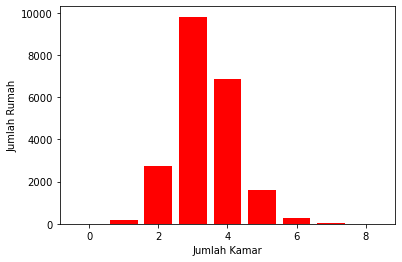

In [16]:
plt.bar(df['bedrooms'].value_counts().index[:9],df['bedrooms'].value_counts().head(9),color='red')

plt.xlabel('Jumlah Kamar')
plt.ylabel('Jumlah Rumah')
plt.show()
#disini kita melihat bahwa jumlah kamar pada umumnya, orang2 fokus ke 3 kamar tidur dalam satu rumah. dan dari data set ini , 
#setelah dijumlahkan semuanya, ada sekitar 9000+ data rumah yg mempunyai kamar tidur 3 saja

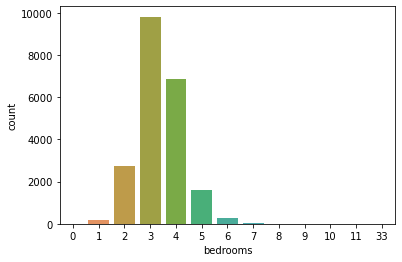

In [17]:
sns.countplot(df['bedrooms'])

(array([1451., 1616., 3764., 4356., 4791., 5635.]),
 array([1900.        , 1919.16666667, 1938.33333333, 1957.5       ,
        1976.66666667, 1995.83333333, 2015.        ]),
 <a list of 6 Patch objects>)

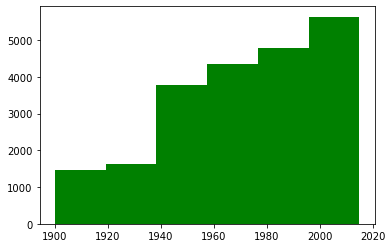

In [18]:
plt.hist(x=df['yr_built'],bins=6,color='green')

In [19]:
# Visualisasi Rumah 10 Rumah Termahal 
m = folium.Map(
location =[47.560053,-122.519000],
    tiles='OpenStreetMap'

)
for z in top_harga.head(10).index: #looping dimana nti H diganti dg index Z
    folium.Marker([df['lat'][z],df['long'][z]],
                  tooltip='House',
             popup=f'Housing {z}',
             icon= folium.Icon(color='red',icon='info-sign')

             ).add_to(m)

dari coding diatas, kita menggunakan folium map, dimana nanti kita looping berdasarkan id yg telah kita ascending tadi diawal yaitu top_harga. (sudah diurutkan) kemudian kita berikan icon,popup maupun tooltip

In [20]:
m

Dari peta diatas,10 Rumah termahal ternyata tidak terletak di 1 tempat (perumahan) melainkan berbeda2 tempat

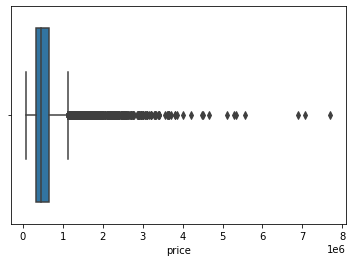

In [21]:
sns.boxplot(df['price']) #dari sini berati bisa disimpulkan bahwa ada lmyn banyak outliers hingga hampir ke 8jt dollar

In [22]:
df['price'].sort_values(ascending=True) #dari sini harga termurah di 75rb dollar dan tertinggi di 7,7jt dollar

1149       75000.0
15293      78000.0
465        80000.0
16198      81000.0
8274       82000.0
           ...    
1448     5350000.0
4411     5570000.0
9254     6885000.0
3914     7062500.0
7252     7700000.0
Name: price, Length: 21613, dtype: float64

In [23]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [24]:
df.drop(columns=['date','id'],inplace=True)

In [25]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [26]:
### Splitting Data

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df.drop(columns='price') #feature /Soal
y = df['price'] #Trget/jawaban

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .20, random_state = 3) #bisa juga pake (KEBALIKAN)train_size = .80

In [29]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14084,3,2.00,1510,43560,1.0,0,0,3,7,1510,0,1954,0,98077,47.7218,-122.079,2060,67756
13750,3,2.50,1970,106722,1.0,0,4,3,9,1970,0,1985,0,98022,47.2498,-122.003,2910,101494
619,3,2.00,1440,7210,1.0,0,0,3,8,1440,0,1983,0,98092,47.3128,-122.184,1700,7245
18985,3,1.00,1000,5100,1.0,0,0,3,7,860,140,1946,0,98115,47.6857,-122.293,1000,5100
21382,4,2.75,2620,7001,2.0,0,0,3,8,2620,0,2012,0,98045,47.4838,-121.769,2620,6543


In [30]:
### Machine Learning Modelling

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train,y_train)

LinearRegression()

In [34]:
pred = model.predict(X_test)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
MAE = mean_absolute_error(y_test,pred)

In [37]:

MSE = mean_squared_error(y_test,pred)

In [38]:
RMSE = np.sqrt(MSE)

In [39]:
R2 = r2_score(y_test,pred)

In [40]:
print('Hasil Evaluation Matrix: ')
print('MAE :', MAE)
print('MSE :', MSE)
print('RMSE :', RMSE)
print('R2 :', R2)

Hasil Evaluation Matrix: 
MAE : 123368.26850175345
MSE : 37517361292.794174
RMSE : 193693.98878848608
R2 : 0.7077188146880506


In [41]:
137647 / (y_test.mean())

0.2550226901020861

### Polynomial Feature

In [42]:
from sklearn.preprocessing import PolynomialFeatures

In [43]:
poli = PolynomialFeatures(degree=2,include_bias=False, interaction_only=True)

In [44]:
X_poli = poli.fit_transform(X)

In [45]:
X_poli.shape

(21613, 171)

In [46]:
X_poli[0]

array([ 3.00000000e+00,  1.00000000e+00,  1.18000000e+03,  5.65000000e+03,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.00000000e+00,
        7.00000000e+00,  1.18000000e+03,  0.00000000e+00,  1.95500000e+03,
        0.00000000e+00,  9.81780000e+04,  4.75112000e+01, -1.22257000e+02,
        1.34000000e+03,  5.65000000e+03,  3.00000000e+00,  3.54000000e+03,
        1.69500000e+04,  3.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        9.00000000e+00,  2.10000000e+01,  3.54000000e+03,  0.00000000e+00,
        5.86500000e+03,  0.00000000e+00,  2.94534000e+05,  1.42533600e+02,
       -3.66771000e+02,  4.02000000e+03,  1.69500000e+04,  1.18000000e+03,
        5.65000000e+03,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        3.00000000e+00,  7.00000000e+00,  1.18000000e+03,  0.00000000e+00,
        1.95500000e+03,  0.00000000e+00,  9.81780000e+04,  4.75112000e+01,
       -1.22257000e+02,  1.34000000e+03,  5.65000000e+03,  6.66700000e+06,
        1.18000000e+03,  

In [48]:
df1=pd.DataFrame(data=X_poli,columns=np.arange(171))

In [49]:
df_All = pd.concat([df,df1],axis=1)

In [50]:
df_All.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,161,162,163,164,165,166,167,168,169,170
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,4.664555e+06,-1.200295e+07,131558520.0,554705700.0,-5808.576778,63665.008,268438.2800,-163824.38,-690752.050,7571000.0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,4.682623e+06,-1.200255e+07,165831250.0,749576875.0,-5837.184999,80648.490,364540.7190,-206719.11,-934394.841,12909910.0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,4.679651e+06,-1.198226e+07,266636160.0,790301736.0,-5835.146731,129847.088,384862.9498,-332473.76,-985442.446,21928640.0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,4.663501e+06,-1.201116e+07,133464960.0,490680000.0,-5816.213274,64628.288,237604.0000,-166454.48,-611965.000,6800000.0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,4.669970e+06,-1.196944e+07,176533200.0,735849222.0,-5811.392356,85710.240,357268.8504,-219681.00,-915703.635,13505400.0


In [51]:
X = df_All.drop(columns='price')
y = df_All['price']

X_train_poli,X_test_poli,y_train_poli,y_test_poli= train_test_split(X,y,train_size=.80,random_state=3)

In [52]:
X = X_poli
y = df.price

In [53]:
model_poli =LinearRegression()

In [54]:
model_poli.fit(X_train_poli,y_train_poli)

LinearRegression()

In [55]:
poli_test = model_poli.predict(X_test_poli)

In [56]:
MAE_poli = mean_absolute_error(y_test_poli,poli_test)

In [57]:
MSE_poli =mean_squared_error(y_test_poli,poli_test)

In [58]:
RMSE_poli = np.sqrt(MSE_poli)

In [59]:
R2_poli = r2_score(y_test_poli,poli_test)

In [60]:
data = {
    "LinReg" : [MAE,MSE,RMSE,R2],
    "Polynomial" : [MAE_poli,MSE_poli,RMSE_poli,R2_poli]
    
}

In [61]:
pd.DataFrame(data=data,index=['MAE','MSE','RMSE','R2'])

,LinReg,Polynomial
MAE,1.233683e+05,1.011974e+05
MSE,3.751736e+10,2.455409e+10
RMSE,1.936940e+05,1.566975e+05
R2,7.077188e-01,8.087099e-01


In [62]:
print('Hasil Evaluation Matrix: ')
print('MAE :', MAE_poli)
print('MSE :', MSE_poli)
print('RMSE :', RMSE_poli)
print('R2 :', R2_poli)

Hasil Evaluation Matrix: 
MAE : 101197.43585310924
MSE : 24554092077.805187
RMSE : 156697.453960826
R2 : 0.8087099175032321


In [95]:
101197/poli_test.mean() #ternyata lebih bagus menggunakan polynom

0.18679791665416942

In [64]:
### Base model XGB

In [65]:
from xgboost import XGBRegressor, XGBClassifier
from sklearn.svm import SVC,SVR

In [66]:
base_XGB = XGBRegressor()

In [67]:
base_XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
y_base_XGB = base_XGB.predict(X_test)

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [70]:
r2_base_XGB = r2_score(y_test,y_base_XGB)
r2_base_XGB

0.8908087323449047

In [71]:
MAE_base_XGB = mean_absolute_error(y_test,y_base_XGB)
MAE_base_XGB

67738.7280281344

In [72]:
MSE_base_XGB = mean_squared_error(y_test,y_base_XGB)

In [73]:
RMSE_base_XGB = np.sqrt(MSE_base_XGB)

In [96]:
67738/y_base_XGB.mean()

0.12540116099930035

In [75]:
data = {
    "LinReg" : [MAE,MSE,RMSE,R2],
    "Polynomial" : [MAE_poli,MSE_poli,RMSE_poli,R2_poli],
    "XGB" : [MAE_base_XGB,MSE_base_XGB,RMSE_base_XGB,r2_base_XGB]
    
}

In [76]:
pd.DataFrame(data=data,index=['MAE','MSE','RMSE','R2'])

,LinReg,Polynomial,XGB
MAE,1.233683e+05,1.011974e+05,6.773873e+04
MSE,3.751736e+10,2.455409e+10,1.401585e+10
RMSE,1.936940e+05,1.566975e+05,1.183885e+05
R2,7.077188e-01,8.087099e-01,8.908087e-01


dari 3 model base, kita bisa pastikan bahwa XGB mempunyai angka r2 terbaik

In [77]:
XGB_model = XGBRegressor()

In [78]:
param_XGB = {'max_depth':[3,5,7,9],'learning_rate':[0.1,0.2,0.5,1],'n_estimators':[100,200,300],'gamma':[0,3,5]}

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
model_tuned = GridSearchCV(estimator=XGB_model,param_grid=param_XGB,cv=3,n_jobs=-1,verbose=1,scoring='r2')

In [81]:
model_tuned.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 11.8min finished


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [82]:
model_tuned_1 = model_tuned.best_estimator_

In [83]:
y_tuned_1 = model_tuned.predict(X_test)

In [84]:
r2_tuned_XGB = r2_score(y_test,y_tuned_1)
r2_tuned_XGB

0.9019312351366205

In [85]:
MAE_tuned_XGB = mean_absolute_error(y_test,y_tuned_1)
MAE_tuned_XGB

65179.26239915857

In [86]:
MSE_tuned_XGB = mean_squared_error(y_test,y_tuned_1)

In [87]:
RMSE_tuned_XGB = np.sqrt(MSE_tuned_XGB)

In [88]:
114851/y_tuned_1.mean()

0.21281275420109286

In [89]:
data = {
    "LinReg" : [MAE,MSE,RMSE,R2],
    "Polynomial" : [MAE_poli,MSE_poli,RMSE_poli,R2_poli],
    "XGB" : [MAE_base_XGB,MSE_base_XGB,RMSE_base_XGB,r2_base_XGB],
    "XGB Tune " :[MAE_tuned_XGB,MSE_tuned_XGB,RMSE_tuned_XGB,r2_tuned_XGB]
}

In [90]:
pd.DataFrame(data=data,index=['MAE','MSE','RMSE','R2'])

,LinReg,Polynomial,XGB,XGB Tune
MAE,1.233683e+05,1.011974e+05,6.773873e+04,6.517926e+04
MSE,3.751736e+10,2.455409e+10,1.401585e+10,1.258816e+10
RMSE,1.936940e+05,1.566975e+05,1.183885e+05,1.121970e+05
R2,7.077188e-01,8.087099e-01,8.908087e-01,9.019312e-01


In [91]:
### Train Data XGB Tune

In [92]:
pred_train = model_tuned.predict(X_train) #data prediksi model(Training)

In [93]:
r2_tuned_train_XGB = r2_score(y_train,pred_train)
r2_tuned_train_XGB

0.9661713188134905

Dari sini bisa dilihat karna perbandingan nya 6%, data bisa disebut FIT karna 96% training, 90% Testing. 

In [94]:
MAE_train_XGB = mean_absolute_error(y_train,pred_train)
MAE_train_XGB

47196.82431137941